# 3.2 Data Mining

In [1]:
# 导入 Selenium 及相关模块，用于自动化浏览器操作
from selenium import webdriver
from selenium.webdriver.edge.service import Service
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.common import NoSuchElementException, StaleElementReferenceException
from selenium.webdriver.support.ui import WebDriverWait

# 导入其他辅助模块
from time import sleep
import pandas as pd
from io import StringIO
from functools import partial
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import numpy as np

# 导入 WebDriver Manager，用于自动下载和管理 Edge 浏览器驱动
from webdriver_manager.microsoft import EdgeChromiumDriverManager

# 初始化 Edge 浏览器驱动
driver = webdriver.Edge()

# 导入建模库
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

## 苏州桥二手房信息

In [10]:
# 定义要访问的网页 URL
url_1 = 'https://esf.fang.com/'
url_2 = 'https://zu.fang.com/'

In [11]:
# 打开房天下二手房首页，尝试点击“海淀”-“苏州桥”区域链接
driver.get(url_1)
try:
    span = driver.find_element(By.XPATH, '/html/body/div[4]/div[3]/div[2]/div[1]/ul/li[1]/ul/li[2]/a')
    span.click()
except NoSuchElementException:
    print('NoSuchElementException')
try:
    block = driver.find_element(By.XPATH, '/html/body/div[4]/div[3]/div[2]/div[1]/ul/li[2]/ul/li[23]/a')
    block.click()
except NoSuchElementException:
    print('NoSuchElementException')

In [12]:
# 抓取二手房信息：名称、面积、总价、单价
data = []

while True:
    wait = WebDriverWait(driver, 10)
    house_list = wait.until(EC.presence_of_all_elements_located( 
    (By.XPATH, "//dl[@class = 'clearfix' and @dataflag = 'bg']") 
    ))
    # 遍历房源条目
    for house in house_list:
        # 名称
        try:
            name = house.find_element(By.XPATH, ".//span[@class = 'tit_shop']").text.strip()
        except:
            name = None
        # 面积（平米）
        try:
            tel_shop = house.find_element(By.XPATH, ".//p[@class = 'tel_shop']").text.strip()
            size = tel_shop.split('|')[1].strip() # split按 '|' 分割，取第二项并去掉空格
        except:
            size = None
        # 总价（万） 
        try:
            total_price = house.find_element(By.XPATH, ".//dd[@class = 'price_right']/span[@class = 'red']").text.strip()
        except:
            total_price = None
        # 单价（元/平米）
        try:
            unit_price = house.find_element(By.XPATH, ".//dd[@class = 'price_right']/span[not(@class)]").text.strip()
        except:
            unit_price = None
        data.append({
            '名称': name,
            '面积': size,
            '总价': total_price,
            '单价': unit_price
        })
        
    # 尝试点击“下一页”
    try:
        nextp = driver.find_element(By.XPATH, "//a[text()='下一页']")
        nextp.click()
    except NoSuchElementException:
        print("没有下一页了，抓取结束")
        break

# 生产DataFrame
df = pd.DataFrame(data)
df

没有下一页了，抓取结束


,名称,面积,总价,单价
0,苏州桥·友谊宾馆家属院不临街中间层正规三居室三条地铁环抱,91.28㎡,720万,78878元/㎡
1,北三环 中关村 友谊宾馆 理工大学 人民大学 业主急售,57㎡,355万,62280元/㎡
2,苏州桥·三义庙·理工北门楼层南北两居,56.7㎡,398万,70194元/㎡
3,苏州桥·三义庙·理工北门楼层南北两居,56.7㎡,398万,70194元/㎡
4,苏州桥人民大学南侧三线地铁南北通透明厅,58.7㎡,480万,81771元/㎡
...,...,...,...,...
305,理工大学北东南北三面采光电梯直达视野很好已做改造,81.36㎡,780万,95870元/㎡
306,紫金庄园 2室1厅 东 南,82.17㎡,710万,86407元/㎡
307,友谊社区双南向央产两居室 安静不临街 价格合理,54.36㎡,420万,77263元/㎡
308,紫金庄园 3室1厅 西,179.8㎡,1300万,72303元/㎡


## 苏州桥租房信息

In [13]:
# 打开房天下租房首页，尝试点击“海淀”-“苏州桥”区域链接
driver.get(url_2)
wait = WebDriverWait(driver, 10)
try:
    haidian = wait.until(EC.element_to_be_clickable((By.XPATH, "//a[text()='海淀']")))
    haidian.click()
except NoSuchElementException:
    print('NoSuchElementException')
try:
    suzhouqiao = wait.until(EC.element_to_be_clickable((By.XPATH, "//a[text()='苏州桥']")))
    suzhouqiao.click()
except NoSuchElementException:
    print('NoSuchElementException')

In [14]:
# 抓取租房信息：名称、面积、总价、单价
data = []

while True:
    wait = WebDriverWait(driver, 10)
    house_list = wait.until(EC.presence_of_all_elements_located((
        By.XPATH, '//dl[@class = "list hiddenMap rel"]'
    )))
    for house in house_list:
        try:
            name = house.find_element(By.XPATH, './/p[@class = "title"]').text.strip()
        except:
            name = None
        try:
            ptext = house.find_element(By.XPATH, './/p[@class = "font15 mt12 bold"]').text.strip()
            size = ptext.split('|')[2].strip()
        except:
            size = None
        try:
            total_price = house.find_element(By.XPATH, './/span[@class = "price"]').text.strip()
        except:
            total_price = None
        size_num = float(size.replace('㎡', '').strip())
        total_price_num = float(total_price.replace('元/月', '').strip())
        unit_rent = round(total_price_num/size_num, 2) if total_price and size else None
        data.append({
        '名称': name,
        '面积': size,
        '总价': total_price,
        '单价': unit_rent
        })

    try:
        nextp = driver.find_element(By.XPATH, './/a[text()="下一页"]')
        nextp.click()
    except NoSuchElementException:
        print("没有下一页了，抓取结束")
        break

df = pd.DataFrame(data)
df

没有下一页了，抓取结束


,名称,面积,总价,单价
0,整租·苏州桥·人民大学静园·3室·1厅,74㎡,15000,202.70
1,可短签可月付北京大学新东方海淀黄庄经典通透三居随时看,85㎡,12500,147.06
2,苏州桥·三义庙·低楼层·2居室·主卧,18㎡,4260,236.67
3,整租·苏州桥·海淀区北三环西路47号·2室·1厅,57㎡,6000,105.26
4,整租·苏州桥·人民大学静园·2室·1厅,58㎡,9500,163.79
...,...,...,...,...
283,整租·上地·友谊家园·1室,44㎡,4500,102.27
284,整租·苏州桥·西颐北馆·2室,60㎡,4999,83.32
285,整租·上地·友谊家园·2室,74㎡,6000,81.08
286,整租·苏州桥·人民大学静园·1室,36㎡,7500,208.33


# 3.3 Data Research

## 数据整合

In [3]:
# 二手房
## 读取各个板块的数据
suzhouqiao_sh_df = pd.read_csv('data/苏州桥二手房.csv')
wanliu_sh_df = pd.read_csv('data/万柳二手房.csv')
beitaipingzhuang_sh_df = pd.read_csv('data/北太平庄二手房.csv')
shijicheng_sh_df = pd.read_csv('data/世纪城二手房.csv')
suzhouqiao_sh_df['location'] = '苏州桥'
wanliu_sh_df['location'] = '万柳'
beitaipingzhuang_sh_df['location'] = '北太平庄'
shijicheng_sh_df['location'] = '世纪城'

## 统一列名
columns = ['name', 'size(㎡)', 'total_price(10thousand)', 'unit_price(yuan/㎡)', 'location']
suzhouqiao_sh_df.columns = columns
wanliu_sh_df.columns = columns
beitaipingzhuang_sh_df.columns = columns
shijicheng_sh_df.columns = columns

## 数据整合
sh_full_data = pd.concat([suzhouqiao_sh_df, wanliu_sh_df, beitaipingzhuang_sh_df, shijicheng_sh_df], ignore_index = True)


# 租房
suzhouqiao_rent_df = pd.read_csv('data/苏州桥租房.csv')
wanliu_rent_df = pd.read_csv('data/万柳租房.csv')
beitaipingzhuang_rent_df = pd.read_csv('data/北太平庄租房.csv')
shijicheng_rent_df = pd.read_csv('data/世纪城租房.csv')
suzhouqiao_rent_df['location'] = '苏州桥'
wanliu_rent_df['location'] = '万柳'
beitaipingzhuang_rent_df['location'] = '北太平庄'
shijicheng_rent_df['location'] = '世纪城'

## 统一列名
columns = ['name', 'size(㎡)', 'rent(yuan/month)', 'unit_rent(yuan/㎡)', 'location']
suzhouqiao_rent_df.columns = columns
wanliu_rent_df.columns = columns
beitaipingzhuang_rent_df.columns = columns
shijicheng_rent_df.columns = columns

## 数据整合
rent_full_data = pd.concat([suzhouqiao_rent_df, wanliu_rent_df, beitaipingzhuang_rent_df, shijicheng_rent_df], ignore_index = True)

## 数据描述

In [4]:
print(len(sh_full_data))
print(len(rent_full_data))
# 海淀区二手房总共有3907个样本量，海淀区租房总共有2993个样本量

print(sh_full_data.isnull().sum())
print(rent_full_data.isnull().sum())
# 每个数据集的列都没有缺失值

print(sh_full_data.dtypes)
print(rent_full_data.dtypes)
# 房屋名称是字符串，二手房的面积和总价是浮动小数，二手房单价是整数；租房的面积、租金、单价都是整数

2903
2989
name                       0
size(㎡)                    0
total_price(10thousand)    0
unit_price(yuan/㎡)         0
location                   0
dtype: int64
name                 0
size(㎡)              0
rent(yuan/month)     0
unit_rent(yuan/㎡)    0
location             0
dtype: int64
name                        object
size(㎡)                    float64
total_price(10thousand)    float64
unit_price(yuan/㎡)           int64
location                    object
dtype: object
name                 object
size(㎡)               int64
rent(yuan/month)      int64
unit_rent(yuan/㎡)     int64
location             object
dtype: object


## 计算关键指标

In [10]:
# 二手房单价已直接从网页抓取，租房单价已在3.2计算

### 苏州桥

#### 异常值判断

In [11]:
# 二手房单价：有2个异常值
mean_sh1 = suzhouqiao_sh_df['unit_price(yuan/㎡)'].mean()
std_sh1 = suzhouqiao_sh_df['unit_price(yuan/㎡)'].std()
suzhouqiao_sh_df['z_score'] = (suzhouqiao_sh_df['unit_price(yuan/㎡)'] - mean_sh1)/std_sh1
outliers_sh1 = suzhouqiao_sh_df[np.abs(suzhouqiao_sh_df['z_score']) > 3]
print(outliers_sh1)
print(len(outliers_sh1))

                          name  size(㎡)  total_price(10thousand)  \
254  三义庙,已做了平改坡顶,不漏雨也不热,朝南向不临街    33.32                    430.0   
261  三义庙 带客厅一居室,高楼层视野好,满二年购房成本    26.80                    410.0   

     unit_price(yuan/㎡) location   z_score  
254              129052      苏州桥  3.693616  
261              152986      苏州桥  5.485260  
2


In [12]:
# 租房单价：有6个异常值
mean_rent1 = suzhouqiao_rent_df['unit_rent(yuan/㎡)'].mean()
std_rent1 = suzhouqiao_rent_df['unit_rent(yuan/㎡)'].std()
suzhouqiao_rent_df['z_score'] = (suzhouqiao_rent_df['unit_rent(yuan/㎡)'] - mean_rent1)/std_rent1
outliers_rent1 = suzhouqiao_rent_df[np.abs(suzhouqiao_rent_df['z_score']) > 3]
print(len(outliers_rent1))

6


#### 房价租金比（price-to-rent ratio）中位数

In [13]:
median_sh1 = suzhouqiao_sh_df['unit_price(yuan/㎡)'].median()
median_rent1 = suzhouqiao_rent_df['unit_rent(yuan/㎡)'].median()*12
median_ptrr1 = median_sh1 / median_rent1
median_ptrr1 


52.46259842519685

### 万柳

#### 异常值判断

In [14]:
# 二手房单价：有1个异常值
mean_sh2 = wanliu_sh_df['unit_price(yuan/㎡)'].mean()
std_sh2 = wanliu_sh_df['unit_price(yuan/㎡)'].std()
wanliu_sh_df['z_score'] = (wanliu_sh_df['unit_price(yuan/㎡)'] - mean_sh2)/std_sh2
outliers_sh2 = wanliu_sh_df[np.abs(wanliu_sh_df['z_score']) > 3]
print(len(outliers_sh2))

1


In [15]:
# 租房单价：有47个异常值
mean_rent2 = wanliu_rent_df['unit_rent(yuan/㎡)'].mean()
std_rent2 = wanliu_rent_df['unit_rent(yuan/㎡)'].std()
wanliu_rent_df['z_score'] = (wanliu_rent_df['unit_rent(yuan/㎡)'] - mean_rent2)/std_rent2
outliers_rent2 = wanliu_rent_df[np.abs(wanliu_rent_df['z_score'] > 3)]
print(len(outliers_rent2))

47


#### 房价租金比中位数

In [16]:
median_sh2 = wanliu_sh_df['unit_price(yuan/㎡)'].median()
median_rent2 = wanliu_rent_df['unit_rent(yuan/㎡)'].median()*12
median_ptrr2 = median_sh2 / median_rent2
median_ptrr2

79.30975877192982

### 北太平庄

#### 异常值判断

In [17]:
# 二手房单价：有0个异常值
mean_sh3 = beitaipingzhuang_sh_df['unit_price(yuan/㎡)'].mean()
std_sh3 = beitaipingzhuang_sh_df['unit_price(yuan/㎡)'].std()
beitaipingzhuang_sh_df['z_score'] = (beitaipingzhuang_sh_df['unit_price(yuan/㎡)'] - mean_sh3)/std_sh3
outliers_sh3 = beitaipingzhuang_sh_df[np.abs(beitaipingzhuang_sh_df['z_score']) > 3]
print(len(outliers_sh3))

0


In [18]:
# 租房单价：有4个异常值
mean_rent3 = beitaipingzhuang_rent_df['unit_rent(yuan/㎡)'].mean()
std_rent3 = beitaipingzhuang_rent_df['unit_rent(yuan/㎡)'].std()
beitaipingzhuang_rent_df['z_score'] = (beitaipingzhuang_rent_df['unit_rent(yuan/㎡)'] - mean_rent3)/std_rent3
outliers_rent3 = beitaipingzhuang_rent_df[np.abs(beitaipingzhuang_rent_df['z_score'] > 3)]
print(len(outliers_rent3))

4


#### 房价租金比中位数

In [19]:
median_sh3 = beitaipingzhuang_sh_df['unit_price(yuan/㎡)'].median()
median_rent3 = beitaipingzhuang_rent_df['unit_rent(yuan/㎡)'].median()*12
median_ptrr3 = median_sh3 / median_rent3
median_ptrr3

55.65128205128205

### 世纪城

#### 异常值判断

In [31]:
# 二手房单价：有12个异常值
mean_sh4 = shijicheng_sh_df['unit_price(yuan/㎡)'].mean()
std_sh4 = shijicheng_sh_df['unit_price(yuan/㎡)'].std()
shijicheng_sh_df['z_score'] = (shijicheng_sh_df['unit_price(yuan/㎡)'] - mean_sh4)/std_sh4
outliers_sh4 = shijicheng_sh_df[np.abs(shijicheng_sh_df['z_score']) > 3]
print(len(outliers_sh4))

12


In [32]:
# 租房单价：有22个异常值
mean_rent4 = shijicheng_rent_df['unit_rent(yuan/㎡)'].mean()
std_rent4 = shijicheng_rent_df['unit_rent(yuan/㎡)'].std()
shijicheng_rent_df['z_score'] = (shijicheng_rent_df['unit_rent(yuan/㎡)'] - mean_rent4)/std_rent4
outliers_rent4 = shijicheng_rent_df[np.abs(shijicheng_rent_df['z_score'] > 3)]
print(len(outliers_rent4))

22


#### 房价租金比中位数

In [22]:
median_sh4 = shijicheng_sh_df['unit_price(yuan/㎡)'].median()
median_rent4 = shijicheng_rent_df['unit_rent(yuan/㎡)'].median()*12
median_ptrr4 = median_sh4 / median_rent4
median_ptrr4

81.34439528023599

## 可视化FigureA

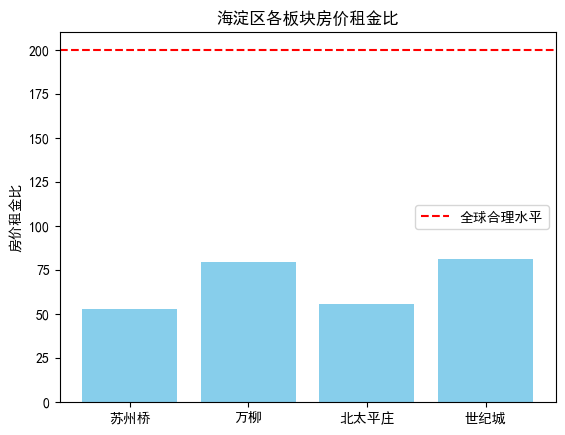

In [23]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.sans-serif'] = ['SimHei']  
rcParams['axes.unicode_minus'] = False    

blocks = ['苏州桥', '万柳', '北太平庄', '世纪城']
median_ptrr = [median_ptrr1, median_ptrr2, median_ptrr3, median_ptrr4]
plt.bar(blocks, median_ptrr, color = 'skyblue')
plt.axhline(200, color='red', linestyle='--', label='全球合理水平')
plt.ylabel('房价租金比')
plt.title('海淀区各板块房价租金比')
plt.legend()
plt.show()

# 3.4 Data Science Modeling

## 模型

In [24]:
# 定义变量
x_price = pd.get_dummies(sh_full_data[['size(㎡)', 'location']], drop_first=True)
x_rent = pd.get_dummies(rent_full_data[['size(㎡)', 'location']], drop_first=True)
y_price = sh_full_data['unit_price(yuan/㎡)']
y_rent = rent_full_data['unit_rent(yuan/㎡)']

# 模型
model_price = LinearRegression().fit(x_price, y_price)
model_rent = LinearRegression().fit(x_rent, y_rent)

# 预期二手房单价和租金单价 
sh_full_data['predicted_price(yuan/㎡)'] = model_price.predict(x_price)
rent_full_data['predicted_price(yuan/㎡)'] = model_price.predict(x_rent)
sh_full_data['predicted_rent(yuan/㎡)'] = model_rent.predict(x_price)
rent_full_data['predicted_rent(yuan/㎡)'] = model_rent.predict(x_rent)

# 整合数据
full_pred_data = pd.DataFrame()
full_pred_data['location'] = pd.concat([sh_full_data['location'], rent_full_data['location']], ignore_index=True)
full_pred_data['predicted__price(yuan/㎡)'] = pd.concat([sh_full_data['predicted_price(yuan/㎡)'], rent_full_data['predicted_price(yuan/㎡)']], ignore_index=True)
full_pred_data['predicted__rent(yuan/㎡)'] = pd.concat([sh_full_data['predicted_rent(yuan/㎡)'], rent_full_data['predicted_rent(yuan/㎡)']], ignore_index=True)

# 计算每条数据的房价租金比
full_pred_data['ptrr'] = full_pred_data['predicted__price(yuan/㎡)']/(full_pred_data['predicted__rent(yuan/㎡)'] *12)
full_pred_data.head()


,location,predicted__price(yuan/㎡),predicted__rent(yuan/㎡),ptrr
0,苏州桥,80923.423625,139.886322,48.207849
1,苏州桥,111129.146138,156.012087,59.359261
2,苏州桥,74504.336331,136.459399,45.498476
3,苏州桥,74875.596440,136.657601,45.658880
4,苏州桥,74727.092397,136.578320,45.594774


## 可视化FigureB

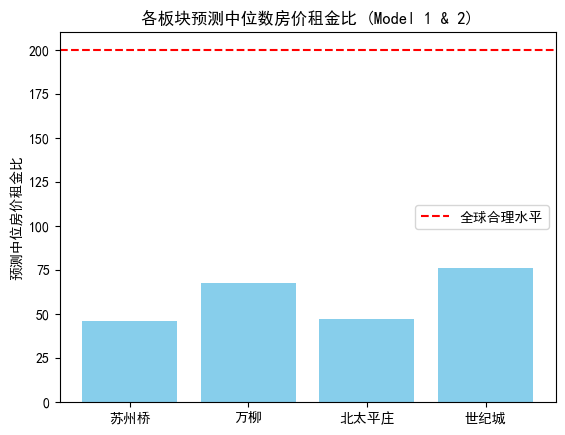

In [25]:
# 计算各板块的中位数房价租金比
pred_suzhouqiao = full_pred_data[full_pred_data['location'] == '苏州桥']
pred_wanliu = full_pred_data[full_pred_data['location'] == '万柳']
pred_beitaipingzhuang = full_pred_data[full_pred_data['location'] == '北太平庄']
pred_shijicheng = full_pred_data[full_pred_data['location'] == '世纪城']
szq_median_pr = pred_suzhouqiao['ptrr'].median()
wl_median_pr = pred_wanliu['ptrr'].median()
btpz_median_pr = pred_beitaipingzhuang['ptrr'].median()
sjc_median_pr = pred_shijicheng['ptrr'].median()

# 绘图
blocks = ['苏州桥', '万柳', '北太平庄', '世纪城']
median_ptrr = [szq_median_pr, wl_median_pr, btpz_median_pr, sjc_median_pr]
plt.bar(blocks, median_ptrr, color='skyblue')
plt.axhline(200, color='red', linestyle='--', label='全球合理水平')
plt.ylabel('预测中位房价租金比')
plt.title('各板块预测中位数房价租金比 (Model 1 & 2)')
plt.legend()
plt.show()




# 3.5 Data Science Modeling Pro Max

## 模型拓展

In [26]:
# 将类别变量 'location' 转化为哑变量
sh_full_data_encoded = pd.get_dummies(sh_full_data, columns=['location'], drop_first=True) 
rent_full_data_encoded = pd.get_dummies(rent_full_data, columns=['location'], drop_first=True)
# 非线性项：加入面积的平方项
poly = PolynomialFeatures(degree=2)  
x_price_poly = poly.fit_transform(sh_full_data_encoded[['size(㎡)'] + [col for col in sh_full_data_encoded.columns if 'location_' in col]].copy()) 
x_rent_poly = poly.fit_transform(rent_full_data_encoded[['size(㎡)'] + [col for col in rent_full_data_encoded.columns if 'location_' in col]].copy())  

# 获取多项式特征名称
poly_features = poly.get_feature_names_out(['size(㎡)'] + [col for col in sh_full_data_encoded.columns if 'location_' in col])

# 交互项：加入面积与地点的交互项
x_price_interaction = pd.DataFrame(x_price_poly, columns=poly_features)
x_rent_interaction = pd.DataFrame(x_rent_poly, columns=poly_features)

# 新模型
model_price_plus = LinearRegression().fit(x_price_interaction, y_price)
model_rent_plus = LinearRegression().fit(x_rent_interaction, y_rent)


## 分析比较

In [27]:
# 计算 R²
r2_price = model_price.score(x_price, y_price)
r2_rent = model_rent.score(x_rent, y_rent) 
r2_price_plus = model_price_plus.score(x_price_interaction, y_price)  
r2_rent_plus = model_rent_plus.score(x_rent_interaction, y_rent)  

# 输出 R² 值
print(f"原始房价模型 R²: {r2_price}")
print(f"原始租金模型 R²: {r2_rent}")
print(f"拓展房价模型 R²: {r2_price_plus}")
print(f"拓展租金模型 R²: {r2_rent_plus}")
# 拓展模型的R²更大，解释力更高

原始房价模型 R²: 0.5994119482872056
原始租金模型 R²: 0.2107985131550073
拓展房价模型 R²: 0.6686301614938226
拓展租金模型 R²: 0.3661600605306027


In [28]:
# 预期二手房单价和租金单价 
sh_full_data['predicted_price(yuan/㎡)_plus'] = model_price_plus.predict(x_price_interaction)
rent_full_data['predicted_price(yuan/㎡)_plus'] = model_price_plus.predict(x_rent_interaction)
sh_full_data['predicted_rent(yuan/㎡)_plus'] = model_rent_plus.predict(x_price_interaction)
rent_full_data['predicted_rent(yuan/㎡)_plus'] = model_rent_plus.predict(x_rent_interaction)

# 整合数据
full_pred_data_plus = pd.DataFrame()
full_pred_data_plus['location'] = pd.concat([sh_full_data['location'], rent_full_data['location']], ignore_index=True)
full_pred_data_plus['predicted__price(yuan/㎡)_plus'] = pd.concat([sh_full_data['predicted_price(yuan/㎡)_plus'], rent_full_data['predicted_price(yuan/㎡)_plus']], ignore_index=True)
full_pred_data_plus['predicted__rent(yuan/㎡)_plus'] = pd.concat([sh_full_data['predicted_rent(yuan/㎡)_plus'], rent_full_data['predicted_rent(yuan/㎡)_plus']], ignore_index=True)

# 计算每条数据的房价租金比
full_pred_data_plus['ptrr_plus'] = full_pred_data_plus['predicted__price(yuan/㎡)_plus']/(full_pred_data_plus['predicted__rent(yuan/㎡)_plus'] *12)
full_pred_data_plus.head()


,location,predicted__price(yuan/㎡)_plus,predicted__rent(yuan/㎡)_plus,ptrr_plus
0,苏州桥,81343.858725,117.963014,57.464240
1,苏州桥,71316.626860,-11.465230,-518.354370
2,苏州桥,81545.102860,143.074036,47.495866
3,苏州桥,81551.892920,141.644557,47.979190
4,苏州桥,81549.448416,142.216686,47.784740


## 可视化

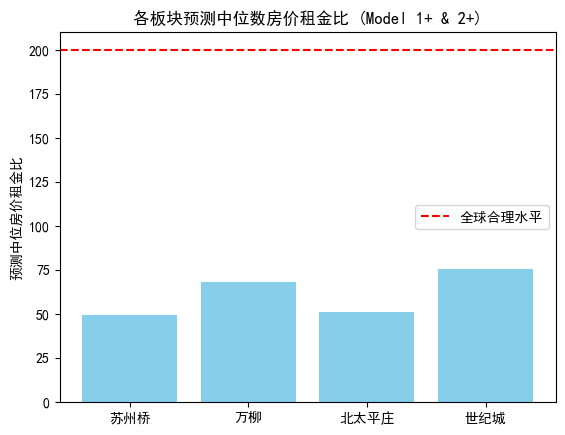

In [29]:
# 计算各板块的中位数房价租金比
pred_szq_plus = full_pred_data_plus[full_pred_data_plus['location'] == '苏州桥']
pred_wl_plus = full_pred_data_plus[full_pred_data_plus['location'] == '万柳']
pred_btpz_plus = full_pred_data_plus[full_pred_data_plus['location'] == '北太平庄']
pred_sjc_plus = full_pred_data_plus[full_pred_data_plus['location'] == '世纪城']
szq_median_pr_plus = pred_szq_plus['ptrr_plus'].median()
wl_median_pr_plus = pred_wl_plus['ptrr_plus'].median()
btpz_median_pr_plus = pred_btpz_plus['ptrr_plus'].median()
sjc_median_pr_plus = pred_sjc_plus['ptrr_plus'].median()

# 绘图
blocks = ['苏州桥', '万柳', '北太平庄', '世纪城']
median_ptrr_plus = [szq_median_pr_plus, wl_median_pr_plus, btpz_median_pr_plus, sjc_median_pr_plus]
plt.bar(blocks, median_ptrr_plus, color='skyblue')
plt.axhline(200, color='red', linestyle='--', label='全球合理水平')
plt.ylabel('预测中位房价租金比')
plt.title('各板块预测中位数房价租金比 (Model 1+ & 2+)')
plt.legend()
plt.show()

## 对比结论

In [30]:
# 小样本量时，3-3 提供的描述性结果最可靠，适用于初步分析，虽然其预测能力有限，但它对数据的理解较为稳健。

# 大样本量时，3-5 的进阶建模结果最值得信任，因为它通过引入非线性和交互项能够更好地拟合数据，提供更高的 R²，从而提升模型的预测能力。